In [1]:
import numpy as np
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer, LinearLayer, SigmoidLayer, SoftmaxLayer
from pybrain.datasets import SupervisedDataSet, ClassificationDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure import FullConnection
from pybrain.structure import FeedForwardNetwork
from pybrain.tools.validation import ModuleValidator
from pybrain.utilities import percentError

### Первая часть

### Tasks 2-4

In [2]:
def buildDataSet(x_data, y_data):
    data = ClassificationDataSet(x_data.shape[1], y_data.shape[1])
    for i in xrange(x_data.shape[0]):
        data.addSample(x_data[i], y_data[i])
    return data

In [3]:
def build_my_net_1(i,h,o):
    net = FeedForwardNetwork()
    inLayer = LinearLayer(i)
    hiddenLayer = TanhLayer(h)
    outLayer = LinearLayer(o)
    net.addInputModule(inLayer)
    net.addModule(hiddenLayer)
    net.addOutputModule(outLayer)
    in_to_hidden = FullConnection(inLayer, hiddenLayer)
    hidden_to_out = FullConnection(hiddenLayer, outLayer)
    net.addConnection(in_to_hidden)
    net.addConnection(hidden_to_out)
    net.sortModules()
    return net    

In [4]:
def calculate_labels(X_train):
    y_train = np.empty(X_train.shape)
    
    for i in range(0, X_train.shape[0]):
        y_train[i] = X_train[i] ** 3
        
    return y_train

In [5]:
def run_tasks(train_data, test_data_1, test_data_2):
    
    figure = 0
    
    MSEs_1 = []
    MSEs_2 = []
    neurons_nums = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
    for neurons_num in neurons_nums:
        network = build_my_net_1(1,neurons_num,1)
        trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
        trainer.trainEpochs(100)
        
        MSE_1 = ModuleValidator.MSE(network, test_data_1)
        MSE_2 = ModuleValidator.MSE(network, test_data_2)
        
        MSEs_1.append(MSE_1)
        MSEs_2.append(MSE_2)
        
        figure += 1
        plt.figure(figure)
        plt.title('Function and approximations on %s neuron number' % neurons_num)
        plt.xlabel('x')
        plt.ylabel('y')
        x_range = np.arange(-3.0, 3.0, 0.1)
        plt.plot(x_range, calculate_labels(x_range), label='function x^3')
        plt.plot(x_range, np.array([network.activate([x]) for x in x_range]), label='approximation')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
    
    figure += 1
    plt.figure(figure)
    plt.title('MSE depending on neuron num')
    plt.xlabel('number of neurons')
    plt.ylabel('MSE')
    plt.plot(neurons_nums, MSEs_1, label='test set 1')
    plt.scatter(neurons_nums, MSEs_1)
    plt.plot(neurons_nums, MSEs_2, label='test set 2')
    plt.scatter(neurons_nums, MSEs_2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

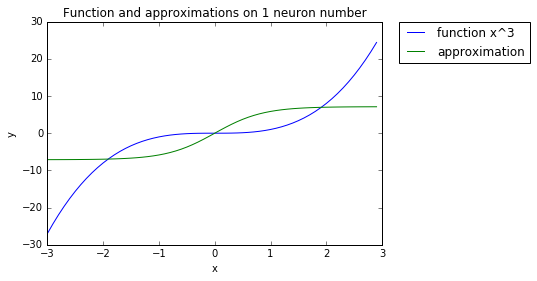

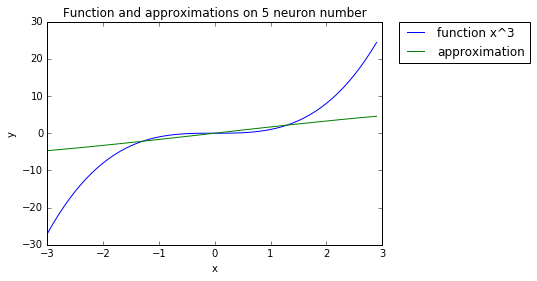

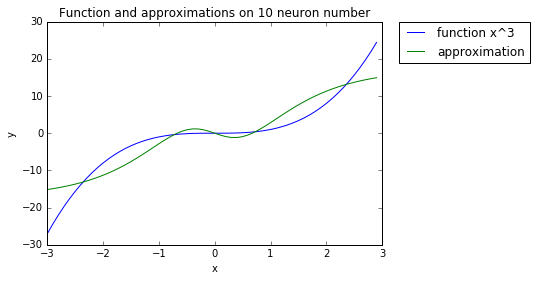

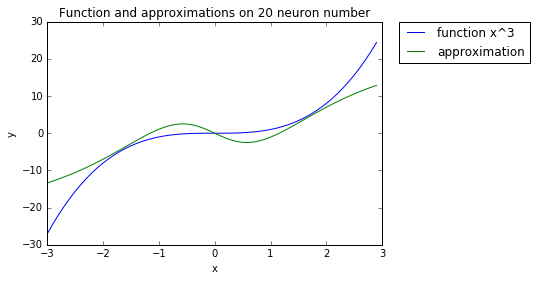

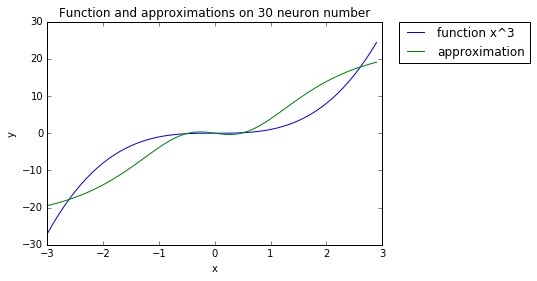

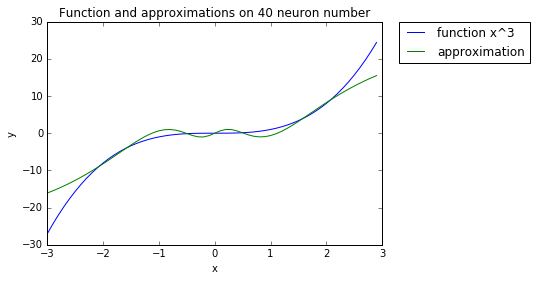

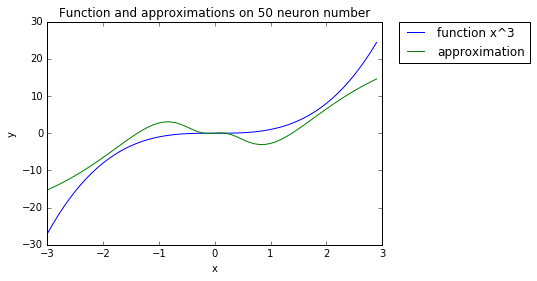

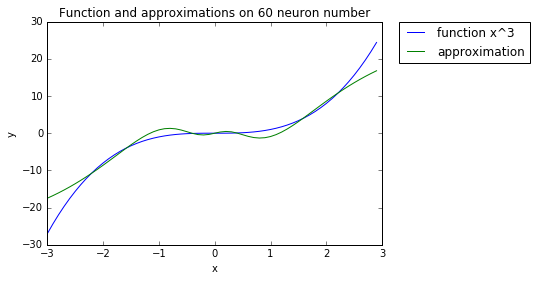

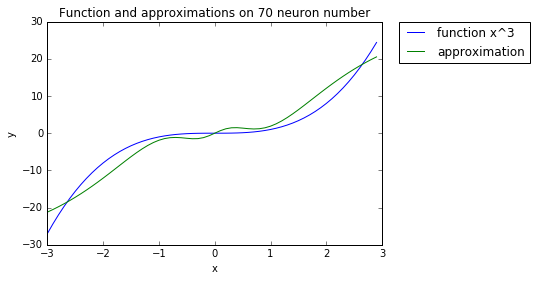

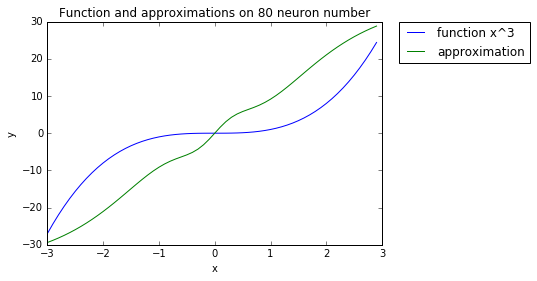

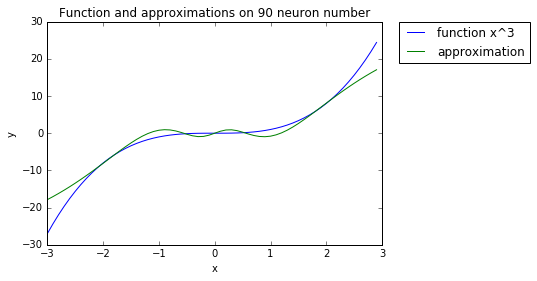

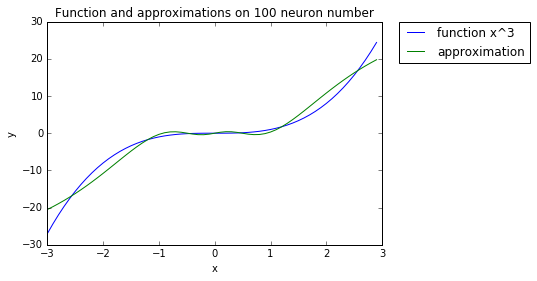

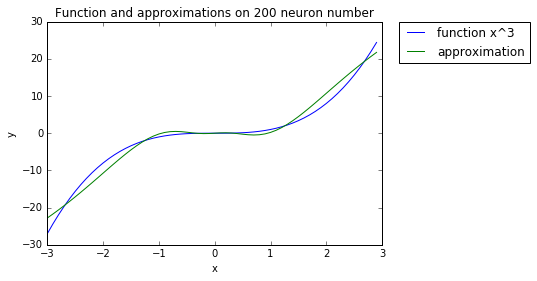

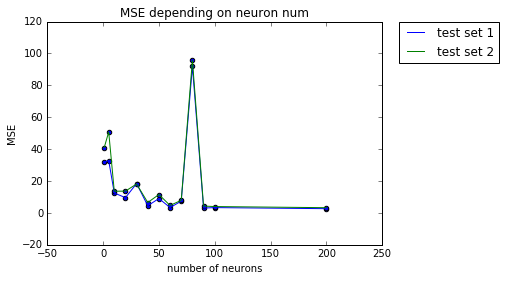

In [6]:
number_for_train = 2000
number_for_test = 1000

X_train = np.random.uniform(-3.0, 2.0, (number_for_train, 1))
y_train = calculate_labels(X_train)
X_test_1 = np.random.uniform(-3.0, 2.0, (number_for_test, 1))
y_test_1 = calculate_labels(X_test_1)

X_test_2 = np.random.uniform(-3.0, 3.0, (number_for_test, 1))
y_test_2 = calculate_labels(X_test_2)

train_data = buildDataSet(X_train, y_train)
test_data_1 = buildDataSet(X_test_1, y_test_1)
test_data_2 = buildDataSet(X_test_2, y_test_2)

run_tasks(train_data, test_data_1, test_data_2)

#### Task 3-a

Судя по графику, можно использовать ~40 нейронов, чтобы построенная сеть хорошо обрабатывала данные.

#### Task 3-b

MSE на втором тестировочном множестве в основном чуть выше, так как промежуток там больше, чем тот, на котором происходило обучение. Однако, разница между MSE не очень большая, ее практически нет.

### Task 5

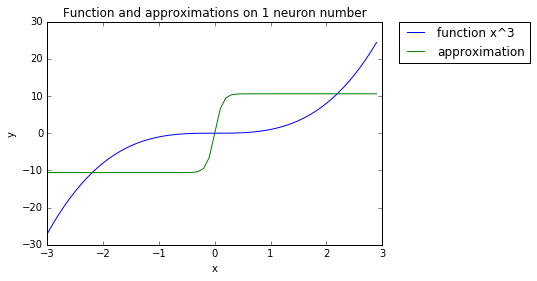

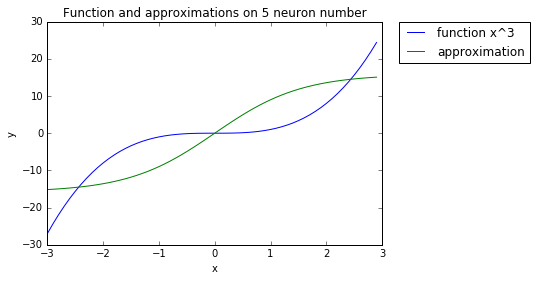

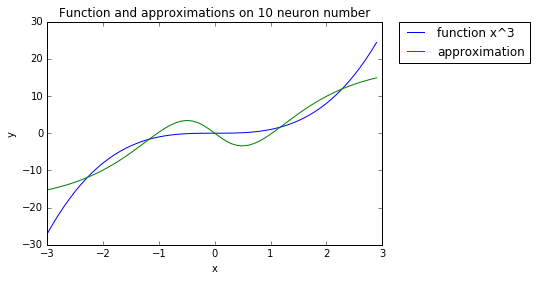

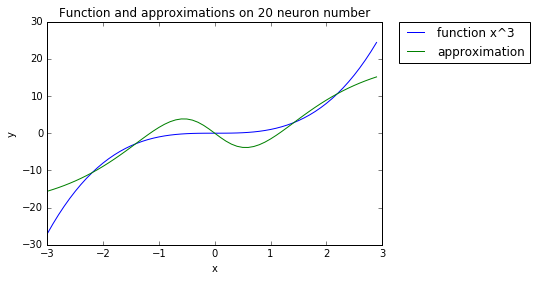

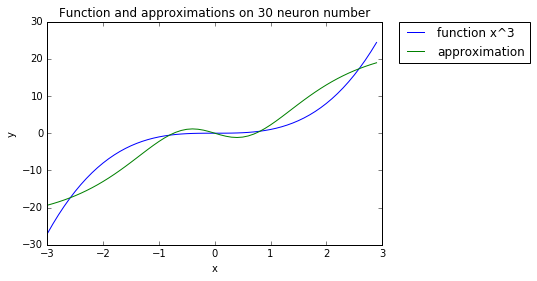

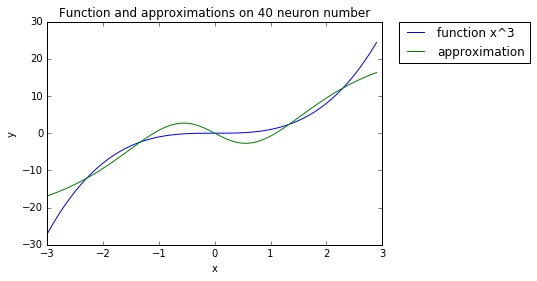

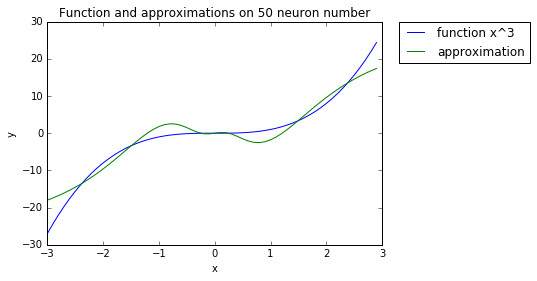

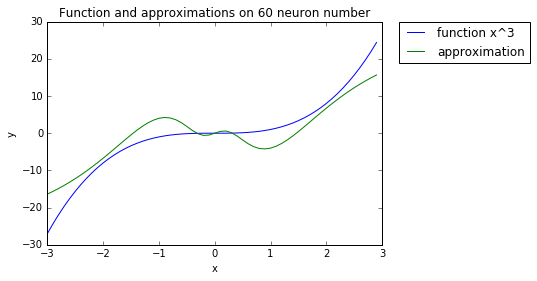

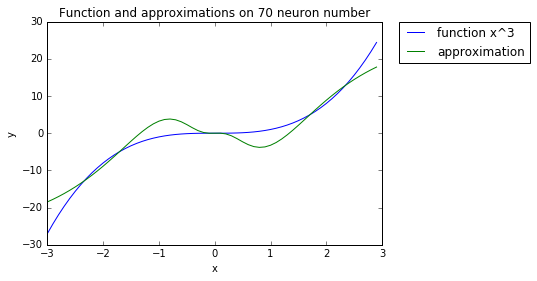

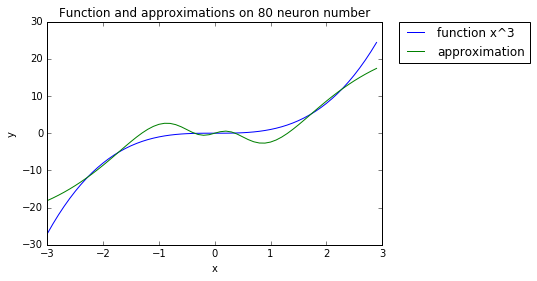

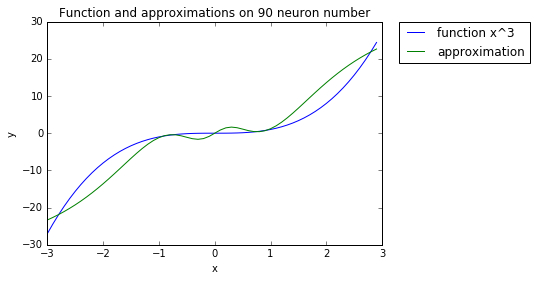

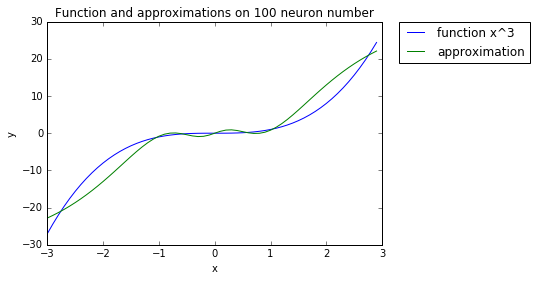

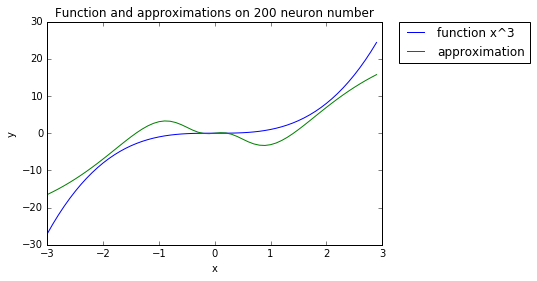

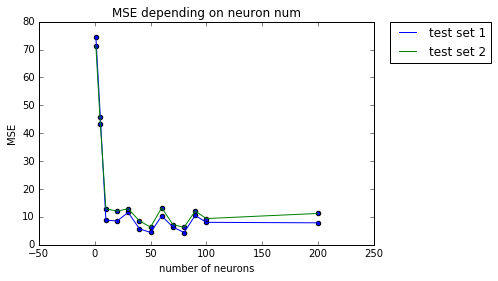

In [7]:
X_train = np.vstack((np.random.uniform(-3.0, 1.0, (number_for_train/2, 1)), np.random.uniform(2.0, 3.0, (number_for_train/2, 1))))
y_train = calculate_labels(X_train)
X_test_1 = np.random.uniform(-3.0, 2.0, (number_for_test, 1))
y_test_1 = calculate_labels(X_test_1)

X_test_2 = np.random.uniform(-3.0, 3.0, (number_for_test, 1))
y_test_2 = calculate_labels(X_test_2)

train_data = buildDataSet(X_train, y_train)
test_data_1 = buildDataSet(X_test_1, y_test_1)
test_data_2 = buildDataSet(X_test_2, y_test_2)

run_tasks(train_data, test_data_1, test_data_2)

### Вторая часть

#### Task 1

In [2]:
train_data = ClassificationDataSet.loadFromFile('mnist_train')
test_data = ClassificationDataSet.loadFromFile('mnist_test')

#### Task 2

In [83]:
def build_my_net_2(i,h,o):
    net = FeedForwardNetwork()
    inLayer = LinearLayer(i)
    hiddenLayer = SigmoidLayer(h)
    outLayer = SoftmaxLayer(o)
    net.addInputModule(inLayer)
    net.addModule(hiddenLayer)
    net.addOutputModule(outLayer)
    in_to_hidden = FullConnection(inLayer, hiddenLayer)
    hidden_to_out = FullConnection(hiddenLayer, outLayer)
    net.addConnection(in_to_hidden)
    net.addConnection(hidden_to_out)
    net.sortModules()
    return net  

#### Task 3

In [5]:
network = build_my_net_2(28*28,30,10)
trainer = BackpropTrainer(network, train_data, weightdecay=0.001)
trainer.trainEpochs(50)

In [3]:
from pybrain.tools.customxml.networkwriter import NetworkWriter
from pybrain.tools.customxml.networkreader import NetworkReader

In [10]:
NetworkWriter.writeToFile(network, 'mynetwork.xml') # сохраняет сеть в файл, чтобы потом не учиться заново

In [4]:
network1 = NetworkReader.readFrom('mynetwork.xml') # читаю сеть, чтобы не учить зановоnetwork

#### Task 4

/Users/Mikhail/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


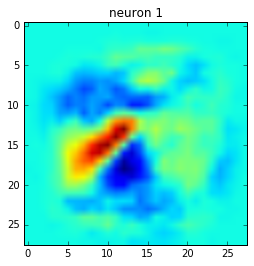

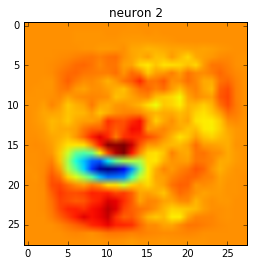

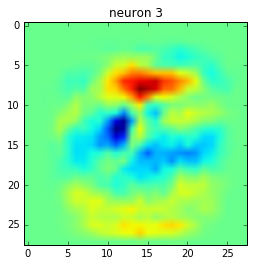

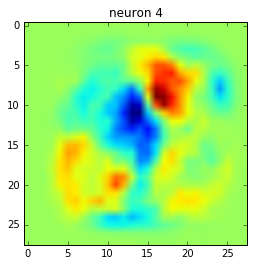

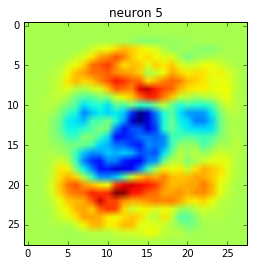

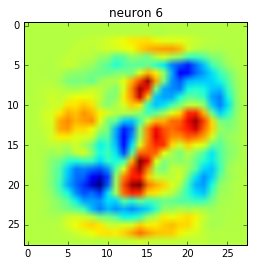

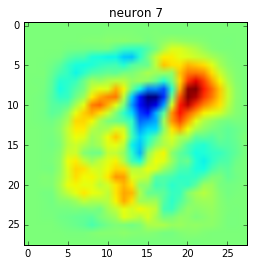

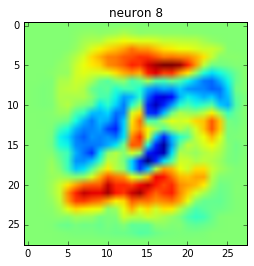

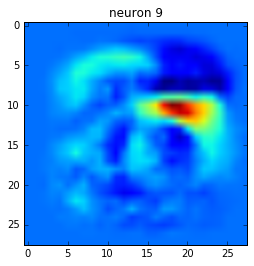

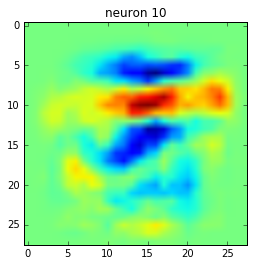

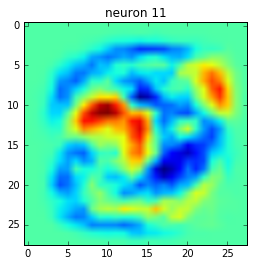

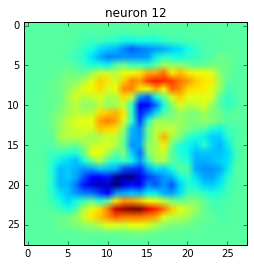

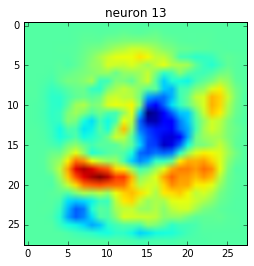

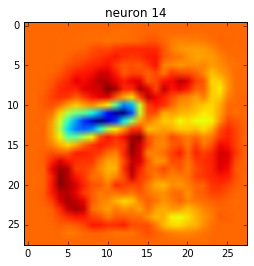

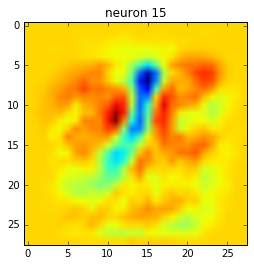

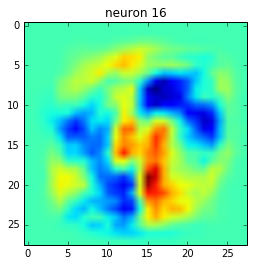

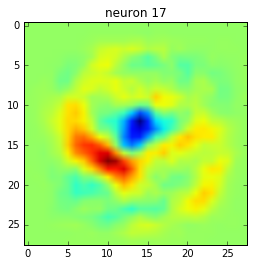

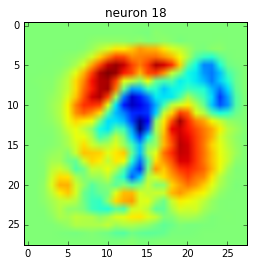

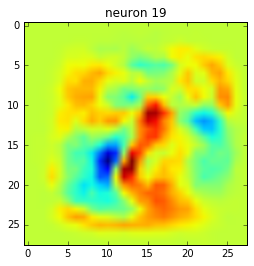

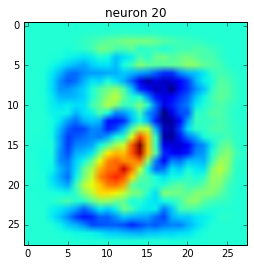

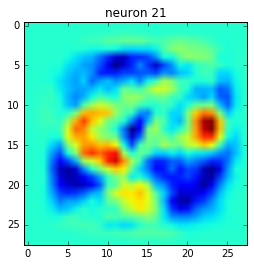

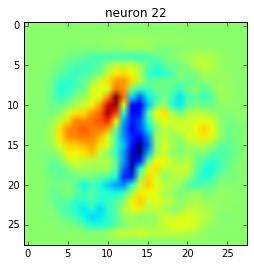

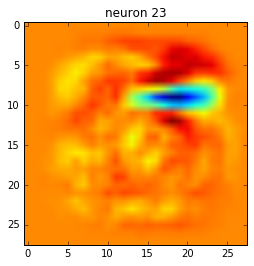

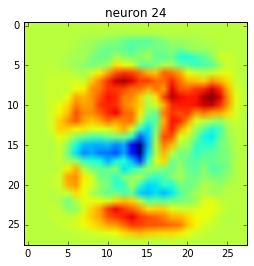

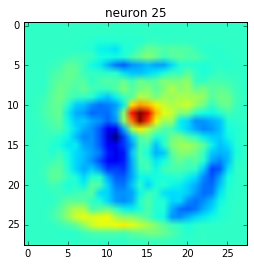

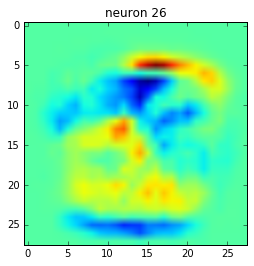

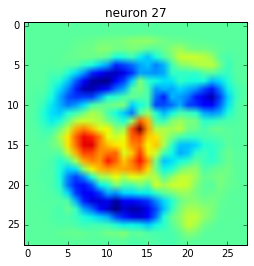

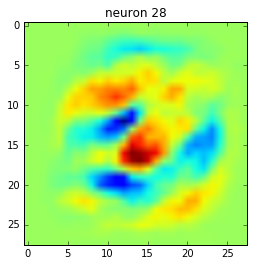

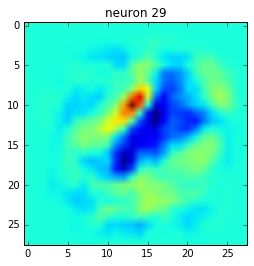

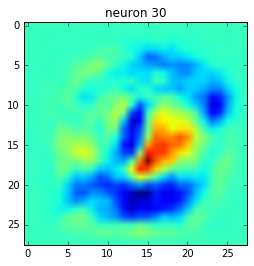

In [7]:
l = network1['LinearLayer-4']
c = network1.connections[l]
neurons_weights = c[0].params.reshape((30, 28, 28)) 

for i in range(30):
    plt.figure(i)
    plt.title('neuron %s' % str(i+1))
    plt.imshow(neurons_weights[i])

#### Task 5

In [8]:
siglayer = network1['SigmoidLayer-9']
print siglayer

<SigmoidLayer 'SigmoidLayer-9'>


In [9]:
def transform(image):
    network1.activate(image)
    return siglayer.outputbuffer[siglayer.offset]

In [10]:
element_count = train_data['input'].shape[0]
train_data_transformed = np.empty((element_count, 30))
for i in range(0, element_count):
    train_data_transformed[i] = transform(train_data['input'][i])
    
element_count = test_data['input'].shape[0]
test_data_transformed = np.empty((element_count, 30))
for i in range(0, element_count):
    test_data_transformed[i] = transform(test_data['input'][i])

In [11]:
print train_data_transformed

[[ 0.50844954  0.90043406  0.99845091 ...,  0.74503207  0.90752882
   0.12197272]
 [ 0.988429    0.10732149  0.99651175 ...,  0.10191404  0.97889552
   0.05327245]
 [ 0.9914607   0.3188114   0.16961228 ...,  0.85522139  0.05661944
   0.81188133]
 ..., 
 [ 0.86201658  0.91633236  0.97409961 ...,  0.84279915  0.95942303
   0.12470306]
 [ 0.99152087  0.07014215  0.05332133 ...,  0.09120847  0.9679605
   0.90462224]
 [ 0.85998289  0.14514493  0.99029215 ...,  0.83176476  0.07992033
   0.10940391]]


#### Task 5-a
Получилась матрица (60000, 30). По этим числам невозможно понять, какие объекты каким классам принадлежат.

#### Task 5-b

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
new_train_data = pca.fit_transform(train_data_transformed,y=train_data['class'])
new_test_data = pca.transform(test_data_transformed)

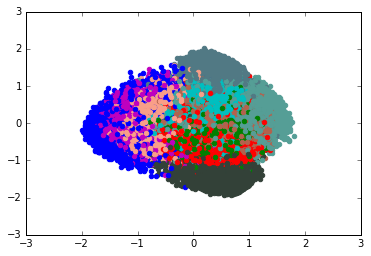

In [79]:
y = np.array(train_data['class'])
y = y.reshape(y.shape[0])

colours = ['#334138', '#517984', '#559e96', '#b3624d', '#f99f88', 'r', 'g', 'b', 'c', 'm']

for o, c in zip(new_train_data, y):
    plt.scatter(o[0], o[1], color=colours[c])
    
plt.show()

In [2]:
pca

NameError: name 'pca' is not defined

Возможно, классы так сложно распределены по следующим причинам:
1. изначально некоторые цифры имеют схожие части (6, 8, 9, 5, 0), поэтому достаточно сложно четко распознать и отличить одну цифру от другой; нейроны дают похожие результаты.
2. переход от 30-мерного пространства к 2-мерному после PCA понизил точность.

Кроме того, классы на таком двумерном пространстве достаточно сложно разделить (особенно те, что в центре пучка точек).

#### Task 5-c

In [12]:
print 'percent error using trained neural network =', percentError(network1.activateOnDataset(test_data), test_data['class'])

percent error using trained neural network = 0.001


In [13]:
from sklearn.neighbors.classification import KNeighborsClassifier as KNN

In [14]:
X = np.array(train_data['input'])
y = np.array(train_data['class'])
y = y.reshape(y.shape[0])
knn = KNN(n_neighbors=3)
knn.fit(X, y)

X = np.array(test_data['input'])
y = np.array(test_data['class'])
y = y.reshape(y.shape[0])

score = knn.score(X, y)
print 'score using knn 3 with original 28*28 image', score

score using knn 3 with original 28*28 image 0.9705


In [15]:
X = train_data_transformed
y = np.array(train_data['class'])
y = y.reshape(y.shape[0])

knn = KNN(n_neighbors=3)
knn.fit(X, y)

X = test_data_transformed
y = np.array(test_data['class'])
y = y.reshape(y.shape[0])

score = knn.score(X, y)
print 'score using knn 3 with hidden neuron activations', score

score using knn 3 with hidden neuron activations 0.9692


1. Четко видно, что нейронная сеть работает точнее и быстрее. Разрыв в точности составляет 2%.
2. Использовать knn на практике не очень подходит для задачи распознавания цифер, так как он работает достаточно долго (особенно тот, что принимает изображение 28x28. Нейронная сеть же достаточно точно распознает цифры и к тому же работает гораздо быстрее.

### Task 6
Плюсы нового feature space:
1. Занимает меньше памяти (30 вместо 784 на один объект);
2. Вследствие уменьшенного количества, меньше overfitting.

Минусы:
1. Чтобы преобразовать исходное изображение, нужна нейронная сеть; 